In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from keras.models import Model
from itertools import chain #for target labels 
from keras.utils import np_utils
import seaborn as sns
import pandas as pd
import tensorflow
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import preprocess_input
warnings.filterwarnings("ignore")

2023-03-29 19:16:44.237879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_test=np.load("test_data.npy");
t_test=np.load("test_labels.npy");
num_of_output_classes=len(np.unique(t_test))
print(num_of_output_classes)
X_test=tensorflow.keras.applications.vgg16.preprocess_input(X_test, data_format=None);

12


In [3]:
class_names=["Airport","Beach","Bridge","Dense Residental","Desert","Forest",
             "Industrial","Mountain","Parking","River","Sparse_Residental","Stadium"]

In [4]:
def conf_matrix_w_acc(y_test, labels):
    # Evaluate trained model in validation set
    cm = confusion_matrix(y_test, labels)
    acc =np.diagonal(cm).sum()/ cm.sum()
    # acc = accuracy_score(y_test,labels)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g', xticklabels = class_names, yticklabels = class_names)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion Matrix (Accuracy = %f)' % acc, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [5]:
def test(class_num,X_test,labels_test,model_name='vgg16_trained_cnn.hdf5',resized_pixel_size=100): 
        #Get Test Data Information, mainly for clarification on our end 
    
        #Setting up labels for keras model
        labels_test_model = np_utils.to_categorical(labels_test, num_classes=class_num)

        # Loads trained model 
        model = tensorflow.keras.models.load_model(model_name)

        #Can print model summary for illustration purposes
        #print(model.summary())

        #Evaluating model on test data 
        loss,accuracy=model.evaluate(X_test,labels_test_model)

        #Generates probability matrix of label assignment 
        y_proba = model.predict(X_test)

        #Grabs largest probability for each photo belonging to a certain class 
        y_classes = np.argmax(y_proba,axis=1)

        #Prints confustion matrix 
        print(conf_matrix_w_acc(labels_test, y_classes))
        
        return accuracy,y_classes

27/27 [==============================] - 29s 1s/step
None


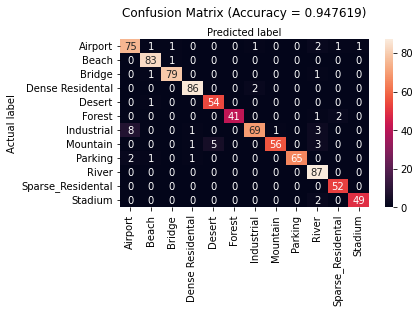

In [6]:
accuracy,y_classes=test(num_of_output_classes,X_test,t_test,model_name='vgg16_trained_cnn.hdf5',resized_pixel_size=100)